<a href="https://colab.research.google.com/github/kgpark88/ai-summary/blob/main/11_DNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 통신사 이탈고객 예측 분류기 구현 실습

### 데이터셋 설명
- customerID: 고객ID  
- gender: 고객 성별  
- SeniorCitizen: 시니어 여부  
- Partner: 고객에게 파트너가 있는지 여부(결혼 여부)    
- Dependents: 고객의 부양 가족 여부  
- tenure: 고객이 회사에 머물렀던 개월 수  
- PhoneService: 고객에게 전화 서비스가 있는지 여부  
- MultipleLines: 고객이 여러 회선을 사용하는지 여부  
- InternetService: 고객의 인터넷 서비스 제공업체  
- OnlineSecurity: 고객의 온라인 보안 여부  
- OnlineBackup: 고객이 온라인 백업을 했는지 여부  
- DeviceProtection: 고객에게 기기 보호 기능이 있는지 여부  
- TechSupport: 고객이 기술 지원을 받았는지 여부  
- StreamingTV: 고객이 스트리밍TV을 가지고 있는지 여부  
- StreamingMovies: 고객이 영화를 스트리밍하는지 여부  
- Contract: 고객의 계약기간  
- PaperlessBilling: 고객의 종이 없는 청구서 수신 여부(모바일 청구서)  
- PaymentMethod: 고객의 결제 수단  
- MonthlyCharges: 매월 고객에게 청구되는 금액  
- TotalCharges: 고객에게 청구된 총 금액  
- Churn: 고객 이탈 여부, 종속 변수  

### 라이브러리 임포트

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

### 데이터 로드

In [ ]:
# df = pd.read_csv('churn_data.csv')
df = pd.read_csv('https://raw.githubusercontent.com/kgpark88/ai-summary/main/churn_data.csv')

### 데이터 분석

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


<AxesSubplot:>

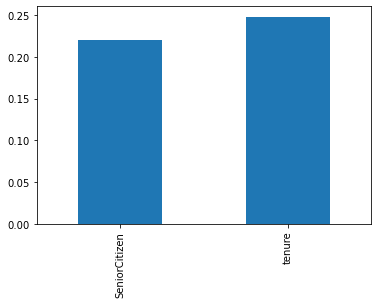

In [ ]:
df.corr()['MonthlyCharges'][:-1].sort_values().plot(kind='bar')

### 데이터 전처리

In [ ]:
df.drop('customerID', axis=1, inplace=True)

In [ ]:
df['TotalCharges'].replace([' '], ['0'], inplace=True)

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)

### 더미 특성 생성

In [ ]:
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
        'PaperlessBilling', 'PaymentMethod']

In [ ]:
dummies = pd.get_dummies(df[cols], drop_first=True)

In [ ]:
df = df.drop(cols, axis=1)

In [ ]:
df = pd.concat([df, dummies], axis=1)

In [ ]:
# df = pd.get_dummies(df)
# cols = list(df.select_dtypes('object').columns)

### Train, Test  데이터셋 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Churn', axis=1).values
y = df['Churn'].values

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [ ]:
X_train.shape

(4930, 30)

In [ ]:
y_train.shape

(4930,)

### <font color='blue'>1. X_train, X_valid 값을 1,0 사이의 값으로 스케일링 하세요.</font>

### 모델 입력갯수, 출력갯수 확인

In [ ]:
X_train.shape

(4930, 30)

In [ ]:
y_train.shape

(4930,)

### <font color='blue'>2. 딥러닝 심층신경망모델(DNN)로 통신사이탈고객을 예측하는 분류기를 만드세요.<br>검증정확도(val_acc)가 80% 이상이 나오도록 하이퍼 파라미터를 설정하세요.<br>그리고, 검증 정확도가 가장 높은 모델을 파일명 best_model.h5로 저장하세요.</font>

Epoch 1/50


InternalError:  Blas GEMM launch failed : a.shape=(10, 30), b.shape=(30, 128), m=10, n=128, k=30
	 [[node sequential/dense/MatMul (defined at <ipython-input-24-0fe6162f8362>:30) ]] [Op:__inference_train_function_1047]

Function call stack:
train_function


### <font color='blue'>3. 학습 정확도, 학습손실, 검증 정확도, 검증손실을 그래프로 표시하세요.</font>